In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1=pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.groupby("area_type")['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
df2=df1.drop(["area_type","availability",'society','balcony'],axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
df3['bhk']=df3["size"].apply(lambda x: int(x.split(" ")[0]))
df3.head()

C:\Users\praka\AppData\Local\Temp\ipykernel_4252\455579093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3["size"].apply(lambda x: int(x.split(" ")[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [9]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [10]:
df3[df3['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [11]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [14]:
def convt_num(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [15]:
df4=df3.copy()
df4["total_sqft"]=df4["total_sqft"].apply(convt_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [16]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [17]:
df5=df4.copy()
df5["price_per_sqft"]=df5["price"]*100000/df5["total_sqft"]
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [18]:
len(df5["location"].unique())

1304

In [19]:
df5.location=df5.location.apply(lambda x: x.strip())
location_stats=df5.groupby(["location"])['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [32]:
len(location_stats[location_stats<=100])

1277

In [34]:
location_less_10=location_stats[location_stats<=100]
location_less_10


location
Chandapura                  98
Bellandur                   96
KR Puram                    88
Hoodi                       88
Electronics City Phase 1    87
                            ..
1 Giri Nagar                 1
Kanakapura Road,             1
Kanakapura main  Road        1
Karnataka Shabarimala        1
whitefiled                   1
Name: location, Length: 1277, dtype: int64

In [35]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_less_10 else x)
len(df5.location.unique())

17

In [36]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,other,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,other,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,other,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,other,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [37]:
len(df5[df5.total_sqft/df5.bhk<300])

744

In [38]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [39]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [40]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out 

df7=remove_pps_outliers(df6)
df7.shape

(11048, 7)

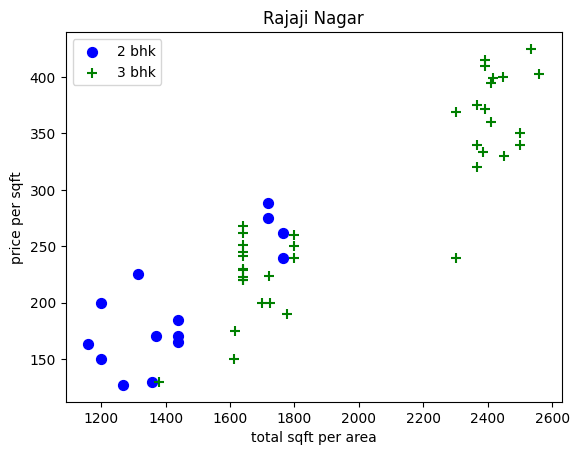

In [41]:
def plotter_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.bhk==2)]
    bhk3=df[(df.location==location)&(df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 bhk',s=50)
    plt.xlabel("total sqft per area")
    plt.ylabel('price per sqft')
    plt.title(location)
    plt.legend()
plotter_scatter_chart(df7,"Rajaji Nagar")

In [42]:
def remove_bhk_outlier(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                "mean":np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values)
    return df.drop(exclude_indices,axis='index')
df8=remove_bhk_outlier(df7)
df8.shape

(6247, 7)

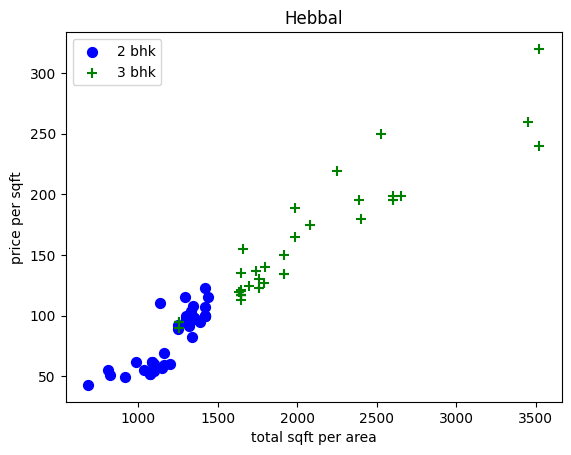

In [43]:
plotter_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'count')

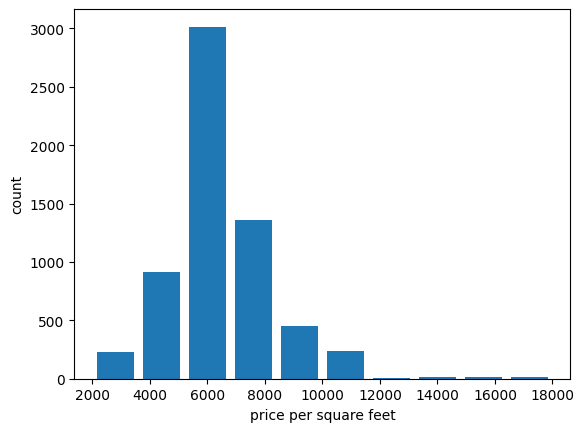

In [44]:
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel('price per square feet')
plt.ylabel('count')

In [45]:
df8.bath.unique()

array([ 2.,  3.,  4.,  1.,  6.,  5.,  8.,  9.,  7., 12., 16., 13.])

Text(0, 0.5, 'count')

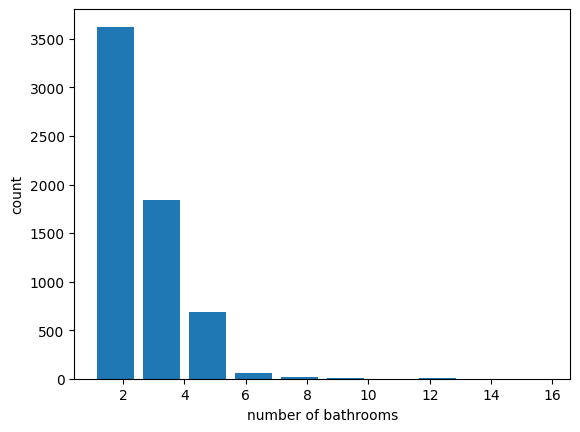

In [46]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel('number of bathrooms')
plt.ylabel('count')

In [47]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
2044,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
4518,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9834,other,4 Bedroom,7000.0,8.0,450.0,4,6428.571429


In [48]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(6179, 7)

In [49]:
df10=df9.drop(['size','price_per_sqft'],axis=1)
df10.head(5)

,location,total_sqft,bath,price,bhk
0,7th Phase JP Nagar,1080.0,2.0,72.0,2
1,7th Phase JP Nagar,1270.0,2.0,93.0,2
2,7th Phase JP Nagar,1420.0,2.0,100.0,3
3,7th Phase JP Nagar,1850.0,3.0,150.0,3
4,7th Phase JP Nagar,1245.0,2.0,94.0,2


In [50]:
dummies=pd.get_dummies(df10.location)
dummies.head()

,7th Phase JP Nagar,Bannerghatta Road,Electronic City,Electronic City Phase II,Haralur Road,Hebbal,Hennur Road,Kanakpura Road,Marathahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka,other
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
df11=pd.concat([df10,dummies.drop('other',axis=1)],axis=1)
df11.head()

,location,total_sqft,bath,price,bhk,7th Phase JP Nagar,Bannerghatta Road,Electronic City,Electronic City Phase II,Haralur Road,...,Hennur Road,Kanakpura Road,Marathahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka
0,7th Phase JP Nagar,1080.0,2.0,72.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7th Phase JP Nagar,1270.0,2.0,93.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7th Phase JP Nagar,1420.0,2.0,100.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7th Phase JP Nagar,1850.0,3.0,150.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7th Phase JP Nagar,1245.0,2.0,94.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df12=df11.drop('location',axis=1)
df12.head()

,total_sqft,bath,price,bhk,7th Phase JP Nagar,Bannerghatta Road,Electronic City,Electronic City Phase II,Haralur Road,Hebbal,Hennur Road,Kanakpura Road,Marathahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka
0,1080.0,2.0,72.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1270.0,2.0,93.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1420.0,2.0,100.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1850.0,3.0,150.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1245.0,2.0,94.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
df12.shape

(6179, 20)

In [54]:
x=df12.drop('price',axis=1)
x.head()

,total_sqft,bath,bhk,7th Phase JP Nagar,Bannerghatta Road,Electronic City,Electronic City Phase II,Haralur Road,Hebbal,Hennur Road,Kanakpura Road,Marathahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka
0,1080.0,2.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1270.0,2.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1420.0,2.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1850.0,3.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1245.0,2.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
y=df12.price
y.head()

0     72.0
1     93.0
2    100.0
3    150.0
4     94.0
Name: price, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [57]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.871352260853378

In [58]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.86308643, 0.92983703, 0.86017971, 0.8608816 , 0.87203158])

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_gridsearchcv(x,y):
    algo={
        "linear regression":{
            "model":LinearRegression(),
            "params":{
                "normalize":[True,False]
            }
        },
        "lasso":{
            "model":Lasso(),
            "params":{
                "alpha":[1,2],
                'selection':["random","cyclic"]
            }
        },
        'decision tree':{
            'model':DecisionTreeRegressor(),
            "params":{
                "criterion":['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algo.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            "best_params":gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_gridsearchcv(x,y)

C:\Users\praka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\praka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous be

,model,best_score,best_params
0,linear regression,0.877203,{'normalize': True}
1,lasso,0.834033,"{'alpha': 1, 'selection': 'random'}"
2,decision tree,0.802563,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [86]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1

    return model.predict([X])[0]

In [87]:
predict_price('Whitefield',1000,2,2)

C:\Users\praka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


56.69165878013712

In [89]:
import pickle
with open('banglore_home_prices_model100.pickle','wb') as f:
    pickle.dump(model,f)

In [90]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns100.json","w") as f:
    f.write(json.dumps(columns))